In [1]:
import os 
os.chdir('../../')

In [2]:
from backbones.sana import SANA

# 사용 예
model = SANA()
print(model)

/home/scpark/miniconda3/envs/sana/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/scpark/miniconda3/envs/sana/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/home/scpark/miniconda3/envs/sana/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")
Loading pipeline components...: 100%

In [3]:
import matplotlib.pyplot as plt

def show_compare(imgs):
    fig, axes = plt.subplots(1, len(imgs), figsize=(18, 10))
    for i in range(len(imgs)):
        axes[i].imshow(imgs[i]); axes[i].axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:

pos_texts = ["Very Cute Cat with Violin in the Super Space"]
neg_texts = ["lowres, bad anatomy, deformed, blurry, pixelated, oversaturated, underexposed, overexposed, artifact, jpeg artifacts, watermark, text, logo, extra limbs, mutated hands, unnatural colors, noisy background, out of focus, poor composition, cultural clichés, stereotype exaggeration, flat lighting, glitch"]

model_fn, noise_schedule, latents = model.get_model_fn(pos_conds=pos_texts, neg_conds=neg_texts, guidance_scale=4.5, seeds=[42])
print('done')

done


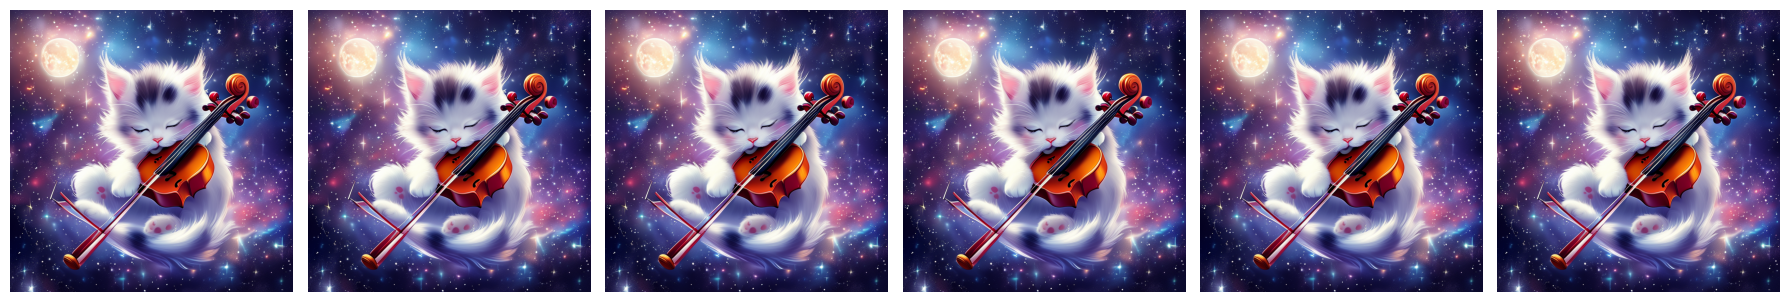

In [23]:
from solvers.dual.gdual_box_solver import GDual_Box_Solver

samples = []
solver = GDual_Box_Solver(model_fn, noise_schedule, algorithm_type='dual_prediction')

latent_samples = solver.sample(latents, steps=200, order=2, skip_type="time_uniform_flow", flow_shift=3.0)
pixel_sample = model.decode_vae(latent_samples)[0]

show_compare([pixel_sample for _ in range(6)])

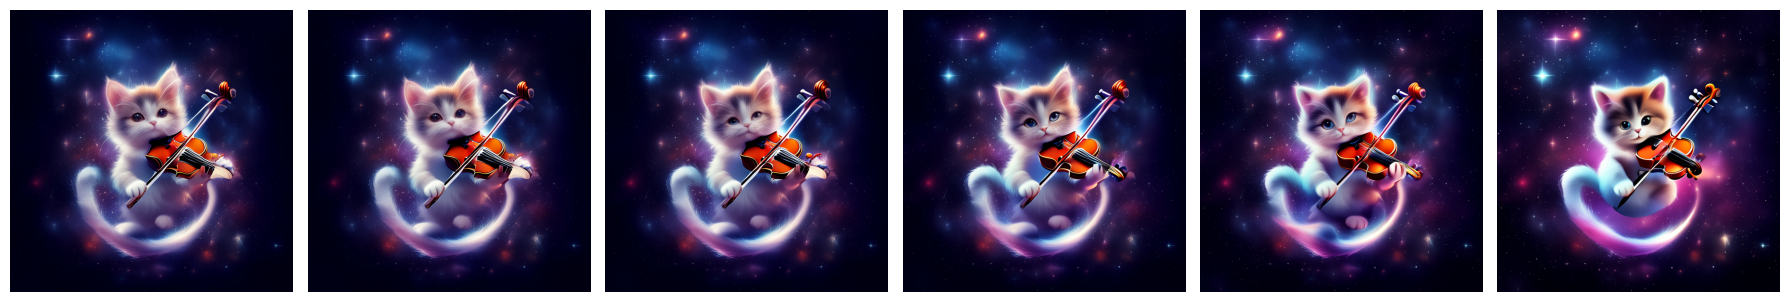

In [24]:
from solvers.dual.gdual_box_solver import GDual_Box_Solver

samples = []
solver = GDual_Box_Solver(model_fn, noise_schedule, algorithm_type='dual_prediction')

for tau in [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]:
    latent_samples = solver.sample(latents, steps=5, order=2, skip_type="time_uniform_flow", flow_shift=3.0, gamma=0.0, tau_x=tau)
    pixel_sample = model.decode_vae(latent_samples)[0]
    samples.append(pixel_sample)

show_compare(samples)

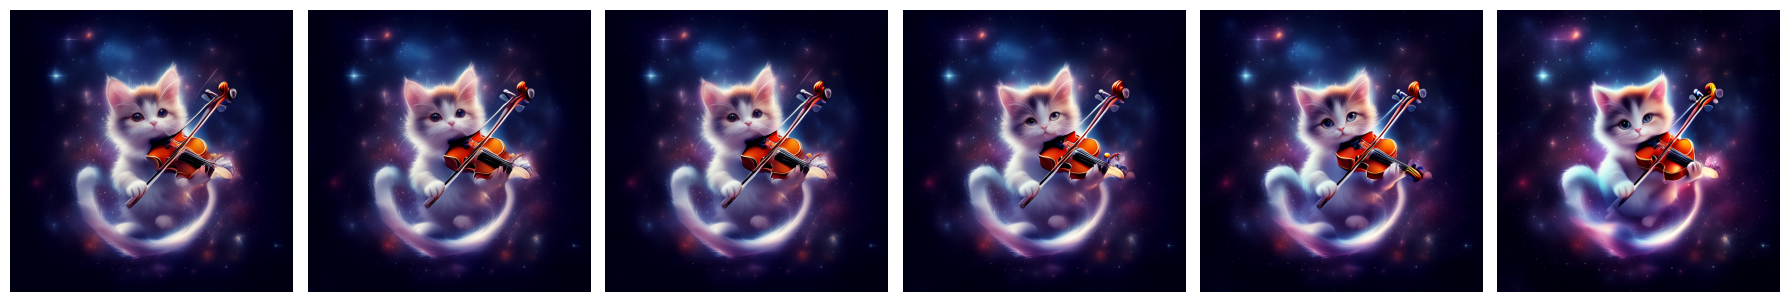

In [25]:
from solvers.dual.gdual_logaffine_solver import GDual_LogAffine_Solver

samples = []
solver = GDual_LogAffine_Solver(model_fn, noise_schedule, algorithm_type='dual_prediction')

for tau in [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]:
    latent_samples = solver.sample(latents, steps=5, order=2, skip_type="time_uniform_flow", flow_shift=3.0, gamma=0.0, tau_x=tau)
    pixel_sample = model.decode_vae(latent_samples)[0]
    samples.append(pixel_sample)

show_compare(samples)